# Data Visualization

This program will take particle data and calculate the effective Diameter (Deff) and plot it against the percent Particle number. 

This program also experiments with pandas 

* Attribute = characterisitc of a data type (no brackets)
* Methods = Function that preforms action with data type (brackets requried)

### Import Particle Data via pandas

In [2]:
# Import statements, set alias
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os


# Define File path
file_path = "/Users/Daniel/Desktop/particle_analysis/Ti64_lot232_results2.csv"

# Check if path exist
if os.path.exists(file_path): print("File path exists")
else: print("Error, file doesn't exist.")

# Open CVS file from Local Comupter 
particle_data = pd.read_csv(file_path)

# Using the head method to visualize data
particle_data.head(8)


File path exists


,,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Perim.,Feret,Median,FeretX,FeretY,FeretAngle,MinFeret
0,1,84.661,255,0,255,255,1696.501,111.422,1696.501,111.422,48.068,18.050,255,2461,174,83.418,7.586
1,2,21.403,255,0,255,255,1.126,200.943,1.126,200.943,36.866,15.922,255,0,279,94.970,2.069
2,3,30.440,255,0,255,255,1458.362,343.610,1458.362,343.610,22.334,8.305,255,2110,494,131.634,6.122
3,4,60.880,255,0,255,255,166.455,579.844,166.455,579.844,32.896,10.795,255,238,848,63.435,8.944
4,5,98.930,255,0,255,255,1510.710,628.959,1510.710,628.959,38.747,12.660,255,2182,908,150.642,11.034
5,6,20.452,255,0,255,255,793.913,755.581,793.913,755.581,16.650,6.168,255,1147,1098,26.565,4.828
6,7,37.099,255,0,255,255,1233.484,1137.993,1233.484,1137.993,22.502,8.072,255,1783,1648,160.017,6.761
7,8,63.734,255,0,255,255,1510.659,1332.383,1510.659,1332.383,53.112,15.313,255,2184,1923,125.838,8.966


In [3]:
# Check the data type of each column , with attribute (no brakets)
particle_data.dtypes


                int64
Area          float64
Mean            int64
StdDev          int64
Min             int64
Max             int64
X             float64
Y             float64
XM            float64
YM            float64
Perim.        float64
Feret         float64
Median          int64
FeretX          int64
FeretY          int64
FeretAngle    float64
MinFeret      float64
dtype: object

### Filter the Data: selecting Specific rows and columns from a DataFrame

In [4]:
# One column in a DataFrame is a Series data type
type(particle_data["Area"])

pandas.core.series.Series

In [5]:
# loc/iloc[row(s), column(s)]

# loc = when using column names and row labels / condition expression

# iloc = index values

particle_data.iloc[0:13, 0:15]

,,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Perim.,Feret,Median,FeretX,FeretY
0,1,84.661,255,0,255,255,1696.501,111.422,1696.501,111.422,48.068,18.050,255,2461,174
1,2,21.403,255,0,255,255,1.126,200.943,1.126,200.943,36.866,15.922,255,0,279
2,3,30.440,255,0,255,255,1458.362,343.610,1458.362,343.610,22.334,8.305,255,2110,494
3,4,60.880,255,0,255,255,166.455,579.844,166.455,579.844,32.896,10.795,255,238,848
4,5,98.930,255,0,255,255,1510.710,628.959,1510.710,628.959,38.747,12.660,255,2182,908
5,6,20.452,255,0,255,255,793.913,755.581,793.913,755.581,16.650,6.168,255,1147,1098
6,7,37.099,255,0,255,255,1233.484,1137.993,1233.484,1137.993,22.502,8.072,255,1783,1648
7,8,63.734,255,0,255,255,1510.659,1332.383,1510.659,1332.383,53.112,15.313,255,2184,1923
8,9,76.100,255,0,255,255,1520.875,1332.009,1520.875,1332.009,38.245,13.964,255,2202,1941
9,10,75.149,255,0,255,255,1531.379,1332.069,1531.379,1332.069,37.674,13.964,255,2217,1941


### Create new column for effective Diameter

In [6]:
# Create and show an effective radius column
# A = PI * r^2 
particle_data["eff_radius"] = ( particle_data["Area"] / math.pi ) ** 1/2  # r = (A/PI)^0.5
print("Show radius column: \n", particle_data["eff_radius"])
print(" ")

# Create a Diameter Column
particle_data["eff_diameter"] = particle_data["eff_radius"] * 2
print("Show diameter column: \n", particle_data["eff_diameter"])
# print("Square root of 4:, ", 4 ** 1/2)

Show radius column: 
 0     13.474217
1      3.406393
2      4.844676
3      9.689353
4     15.745199
5      3.255037
6      5.904489
7     10.143581
8     12.111691
9     11.960335
10    10.370695
11    13.474217
12     4.617562
Name: eff_radius, dtype: float64
 
Show diameter column: 
 0     26.948433
1      6.812786
2      9.689353
3     19.378706
4     31.490397
5      6.510074
6     11.808978
7     20.287162
8     24.223382
9     23.920670
10    20.741390
11    26.948433
12     9.235125
Name: eff_diameter, dtype: float64


### Create a particle percentage

In [7]:
particle_data

,,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Perim.,Feret,Median,FeretX,FeretY,FeretAngle,MinFeret,eff_radius,eff_diameter
0,1,84.661,255,0,255,255,1696.501,111.422,1696.501,111.422,48.068,18.050,255,2461,174,83.418,7.586,13.474217,26.948433
1,2,21.403,255,0,255,255,1.126,200.943,1.126,200.943,36.866,15.922,255,0,279,94.970,2.069,3.406393,6.812786
2,3,30.440,255,0,255,255,1458.362,343.610,1458.362,343.610,22.334,8.305,255,2110,494,131.634,6.122,4.844676,9.689353
3,4,60.880,255,0,255,255,166.455,579.844,166.455,579.844,32.896,10.795,255,238,848,63.435,8.944,9.689353,19.378706
4,5,98.930,255,0,255,255,1510.710,628.959,1510.710,628.959,38.747,12.660,255,2182,908,150.642,11.034,15.745199,31.490397
5,6,20.452,255,0,255,255,793.913,755.581,793.913,755.581,16.650,6.168,255,1147,1098,26.565,4.828,3.255037,6.510074
6,7,37.099,255,0,255,255,1233.484,1137.993,1233.484,1137.993,22.502,8.072,255,1783,1648,160.017,6.761,5.904489,11.808978
7,8,63.734,255,0,255,255,1510.659,1332.383,1510.659,1332.383,53.112,15.313,255,2184,1923,125.838,8.966,10.143581,20.287162
8,9,76.100,255,0,255,255,1520.875,1332.009,1520.875,1332.009,38.245,13.964,255,2202,1941,69.775,9.655,12.111691,24.223382
9,10,75.149,255,0,255,255,1531.379,1332.069,1531.379,1332.069,37.674,13.964,255,2217,1941,69.775,8.966,11.960335,23.920670


In [41]:
# Rename column with particle numbers
particle_data1 = particle_data.rename( columns= {" ":"particle_number",
                                                 "eff_radius":"eff_radius_microns",
                                                "eff_diameter":"eff_diameter_microns"})

# Create a percent particle column
total_particles =list(particle_data1["particle_number"])[-1] # Grab length of list
print("total numnber of particles in this dataset: ", total_particles)

# sort the data
particle_data1 = particle_data1.sort_values(by="eff_diameter_microns")
particle_data1["percent_particle"] = particle_data1["particle_number"] / total_particles

# Create a smaller table to work with 
# particle_disitribution = particle_data1.iloc[:total_particles, -1:]


total numnber of particles in this dataset:  13
Percent Particle list:  [0.46153846153846156, 0.15384615384615385, 1.0, 0.23076923076923078, 0.5384615384615384, 0.3076923076923077, 0.6153846153846154, 0.8461538461538461, 0.7692307692307693, 0.6923076923076923, 0.9230769230769231, 0.07692307692307693, 0.38461538461538464]
length of percent_particle_list: 13 value of list[ len(list)]: 0.38461538461538464
0.46153846153846156


IndexError: list index out of range

In [ ]:
# # cumulative percent particle
# percent_particle_list = list(particle_data1["percent_particle"])
# print("Percent Particle list: ", percent_particle_list)
# print('length of percent_particle_list:', len(percent_particle_list),
#        "value of list[ len(list)]:", percent_particle_list[len(percent_particle_list)-1])

# # Declaration statement 
# cum_percent_particle_list = [] 
# for i in range(0,len(percent_particle_list)):
#     print(percent_particle_list[i])


#     if i == 0:
#         cum_percent_particle_list[i] +=  percent_particle_list[0]
#     else: 
#         cum_percent_particle_list[i] +=  percent_particle_list[i] + percent_particle_list[i-1] 

# print(cum_percent_particle_list)
# print("length of the cumulative list: ", len(cum_percent_particle_list))

In [9]:
# Check DataFrame object
# particle_disitribution
particle_data1

,particle_number,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Perim.,Feret,Median,FeretX,FeretY,FeretAngle,MinFeret,eff_radius_microns,eff_diameter_microns,percent_particle
5,6,20.452,255,0,255,255,793.913,755.581,793.913,755.581,16.650,6.168,255,1147,1098,26.565,4.828,3.255037,6.510074,0.461538
1,2,21.403,255,0,255,255,1.126,200.943,1.126,200.943,36.866,15.922,255,0,279,94.970,2.069,3.406393,6.812786,0.153846
12,13,29.013,255,0,255,255,249.469,1416.750,249.469,1416.750,31.418,14.499,255,350,2055,177.274,2.759,4.617562,9.235125,1.000000
2,3,30.440,255,0,255,255,1458.362,343.610,1458.362,343.610,22.334,8.305,255,2110,494,131.634,6.122,4.844676,9.689353,0.230769
6,7,37.099,255,0,255,255,1233.484,1137.993,1233.484,1137.993,22.502,8.072,255,1783,1648,160.017,6.761,5.904489,11.808978,0.538462
3,4,60.880,255,0,255,255,166.455,579.844,166.455,579.844,32.896,10.795,255,238,848,63.435,8.944,9.689353,19.378706,0.307692
7,8,63.734,255,0,255,255,1510.659,1332.383,1510.659,1332.383,53.112,15.313,255,2184,1923,125.838,8.966,10.143581,20.287162,0.615385
10,11,65.161,255,0,255,255,1546.970,1335.109,1546.970,1335.109,56.176,15.498,255,2237,1946,57.724,10.345,10.370695,20.741390,0.846154
9,10,75.149,255,0,255,255,1531.379,1332.069,1531.379,1332.069,37.674,13.964,255,2217,1941,69.775,8.966,11.960335,23.920670,0.769231
8,9,76.100,255,0,255,255,1520.875,1332.009,1520.875,1332.009,38.245,13.964,255,2202,1941,69.775,9.655,12.111691,24.223382,0.692308


### Visualization

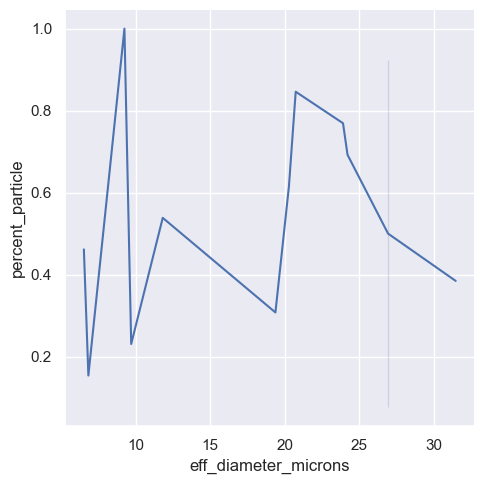

In [12]:
# Apply default theme of Seaborn
sns.set_theme()

# Create a relationaship visualization
sns.relplot(
    data= particle_data1,
    x="eff_diameter_microns", y="percent_particle",
    # kind="line"
)

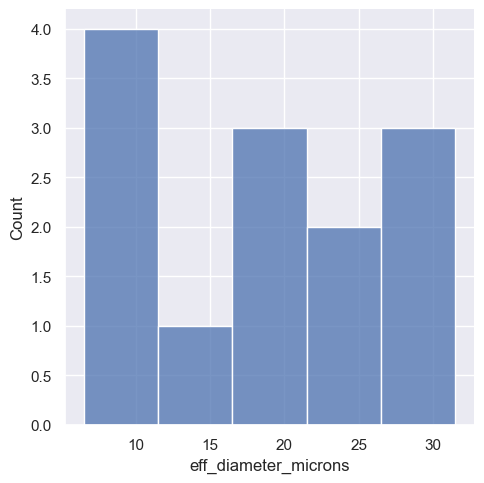

In [11]:
# Ask for clafification !?!?!
sns.displot(
    data= particle_data1,
    x="eff_diameter_microns", 
    
)

# Next Steps
1. Go back to the percent particle and sort the data before finding the percentages - https://pandas.pydata.org/docs/user_guide/basics.html#sorting 
2. verify sort
3. compute the percentages

4. plot the data , again